# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari public repositories kaggle dengan link : [Kaggle](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/LeonardoFM73/Eksperimen_SML_Leonardo-Fajar-Mardika_Preprocessing/refs/heads/main/student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [4]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [5]:
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

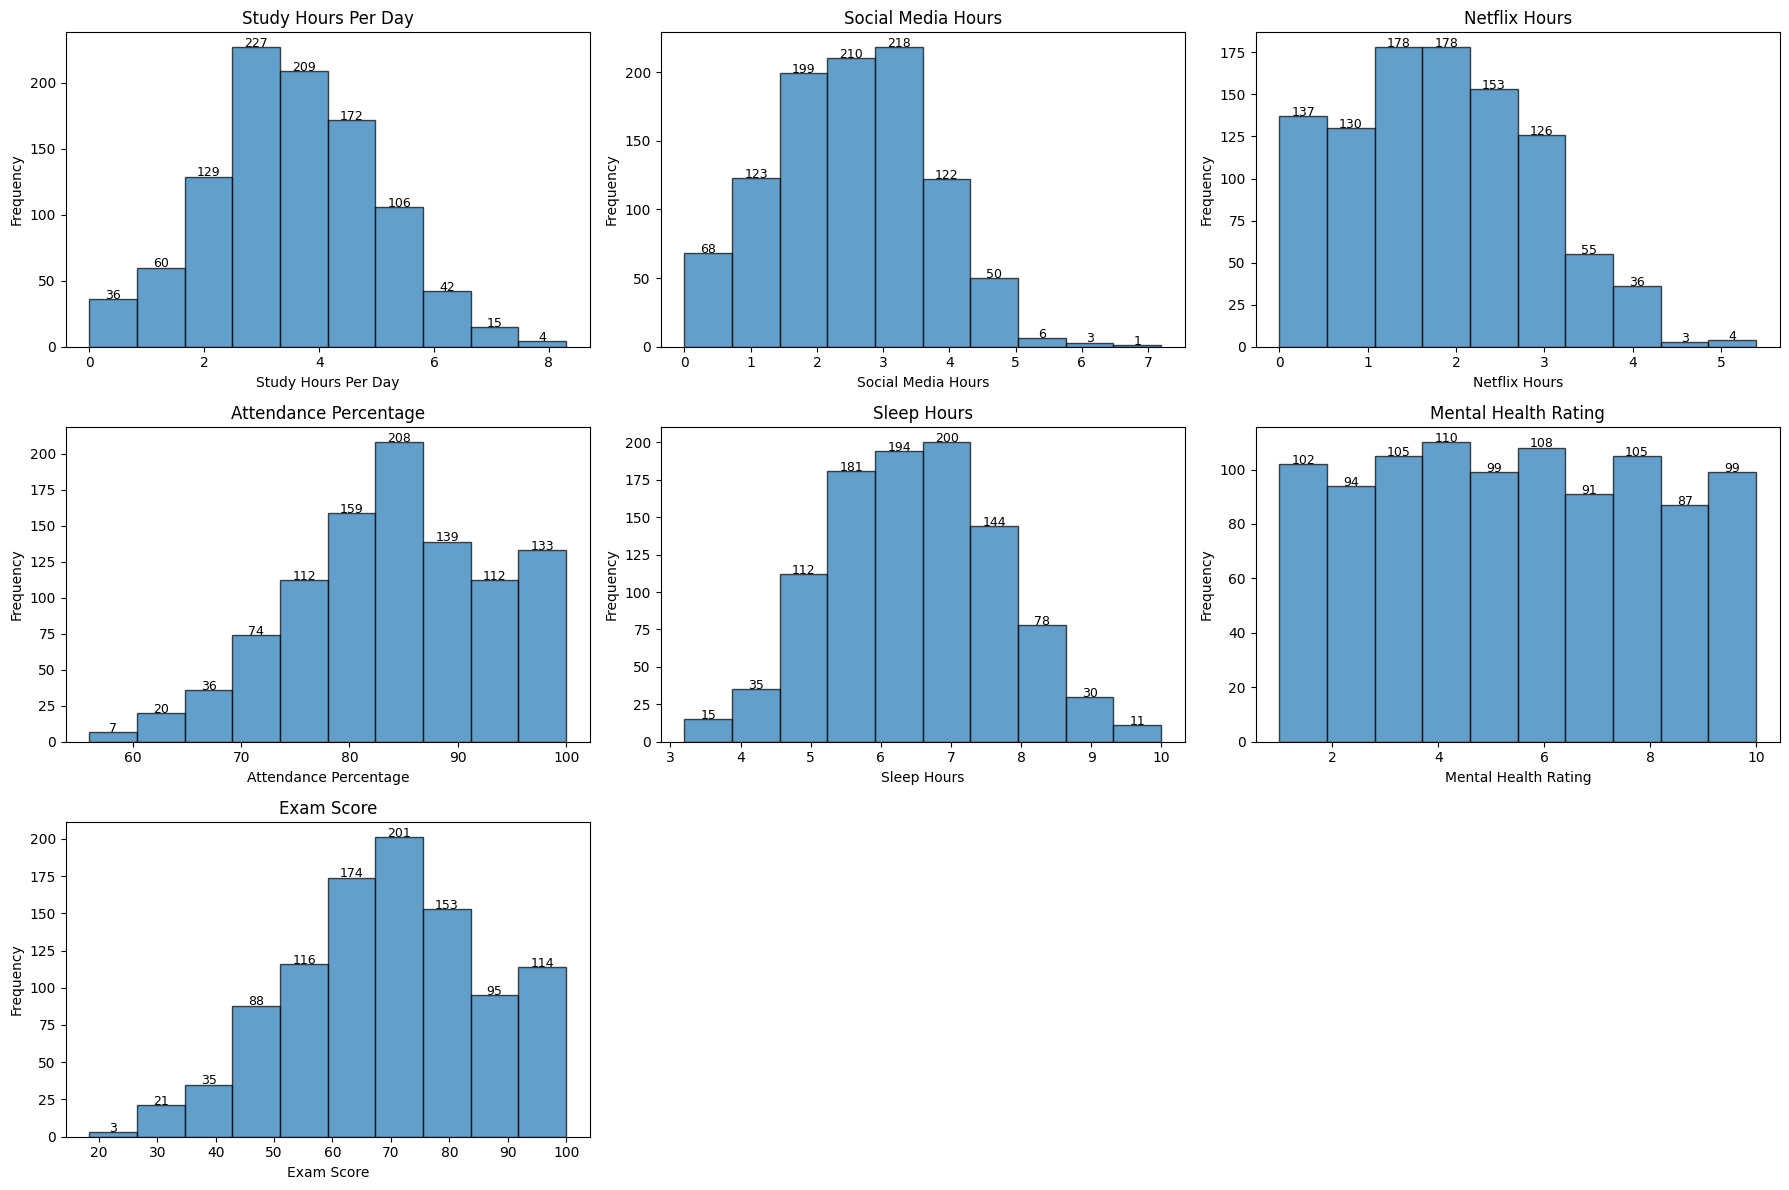

In [7]:
# --- Distribusi Histogram Variabel Numerik ---
numeric_cols = ['study_hours_per_day', 'social_media_hours', 'netflix_hours',
                'attendance_percentage', 'sleep_hours', 'mental_health_rating', 'exam_score']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    n, bins, patches = axes[i].hist(df[col].dropna(), bins=10, edgecolor='black', alpha=0.7)
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_xlabel(col.replace('_', ' ').title())
    axes[i].set_ylabel('Frequency')
    
    for j in range(len(n)):
        axes[i].text(bins[j] + (bins[1] - bins[0]) / 2, n[j] + 0.1, str(int(n[j])), ha='center', fontsize=9)

# Kosongkan sisa subplot jika jumlah variabel kurang dari 9
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

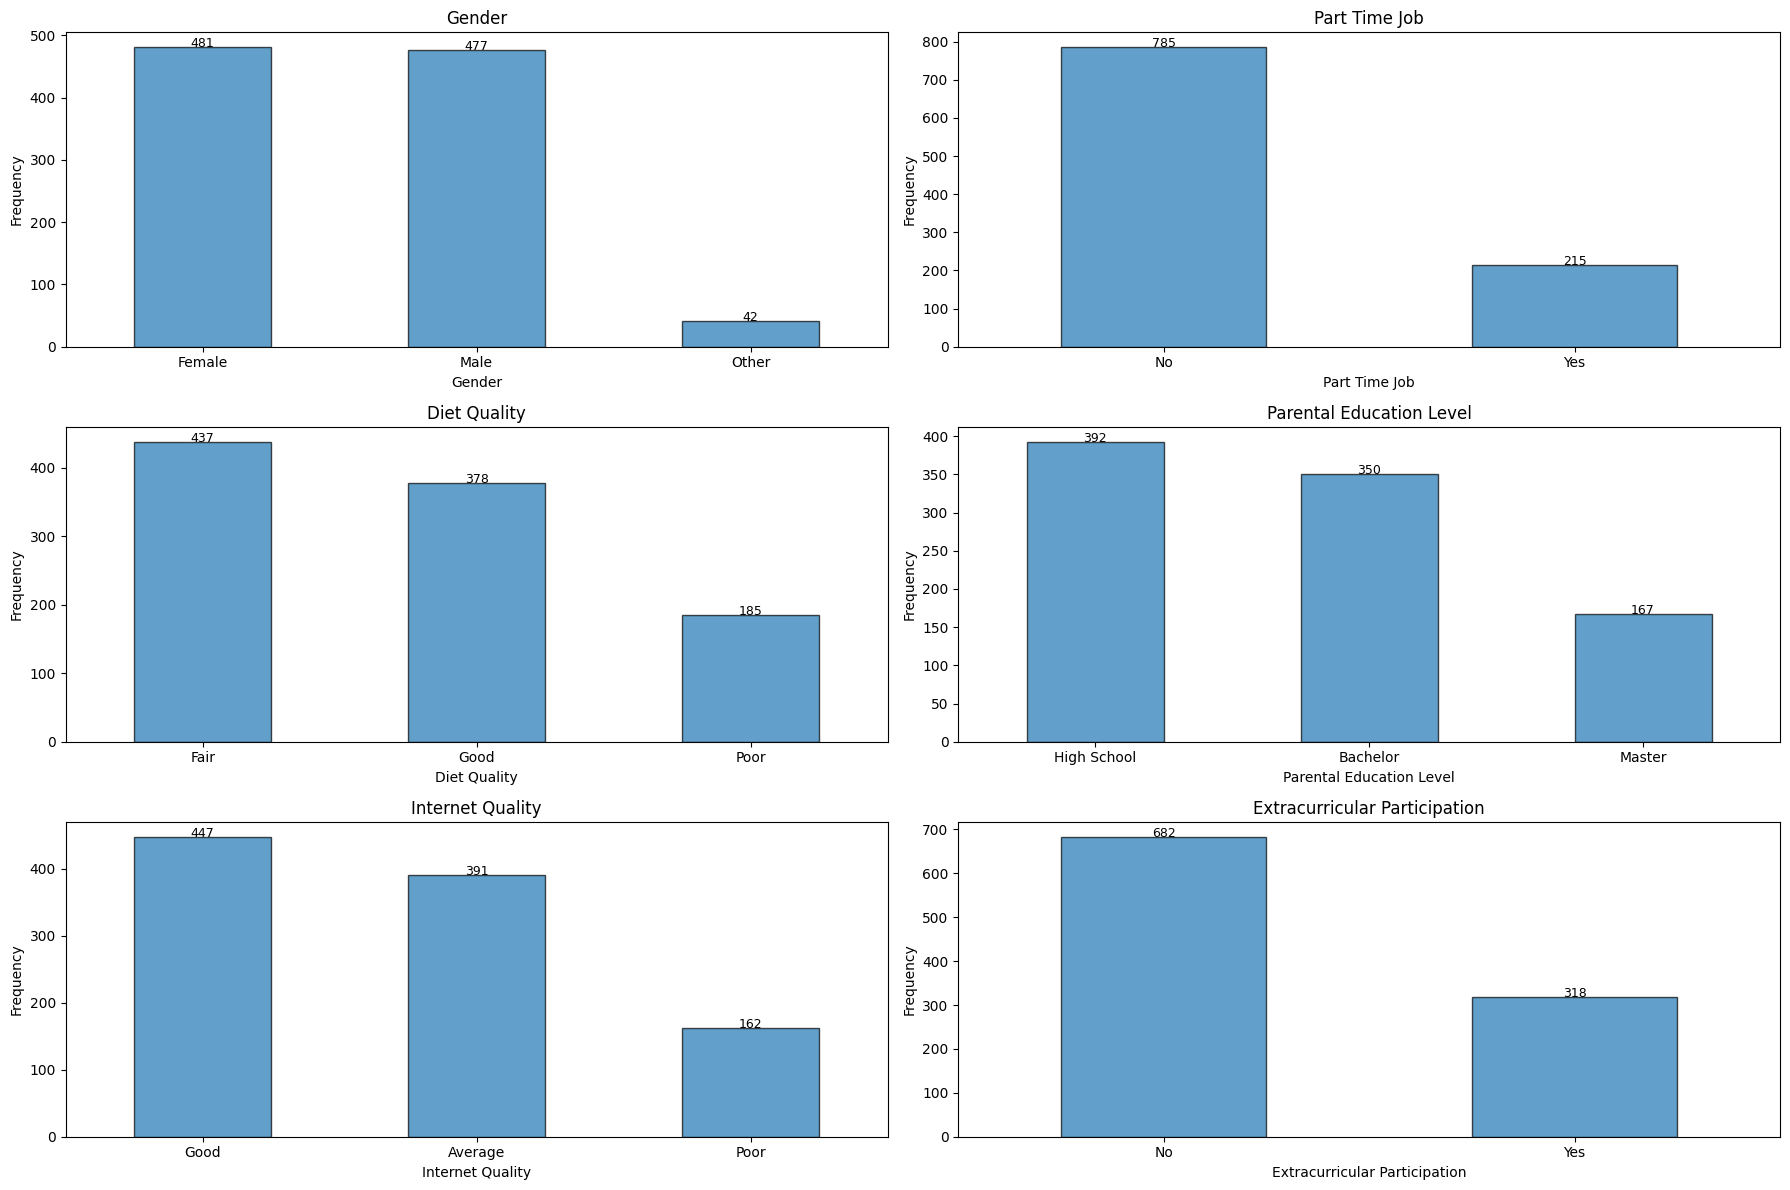

In [10]:
categorical_cols = ['gender', 'part_time_job', 'diet_quality',
                'parental_education_level', 'internet_quality', 'extracurricular_participation']

fig, axes = plt.subplots(3, 2, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=axes[i], edgecolor='black', alpha=0.7)

    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_xlabel(col.replace('_', ' ').title())
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=0)

    # Tambahkan label di atas batang
    for idx, val in enumerate(value_counts):
        axes[i].text(idx, val + 0.1, str(val), ha='center', fontsize=9)
    

# Hapus subplot yang kosong
for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()


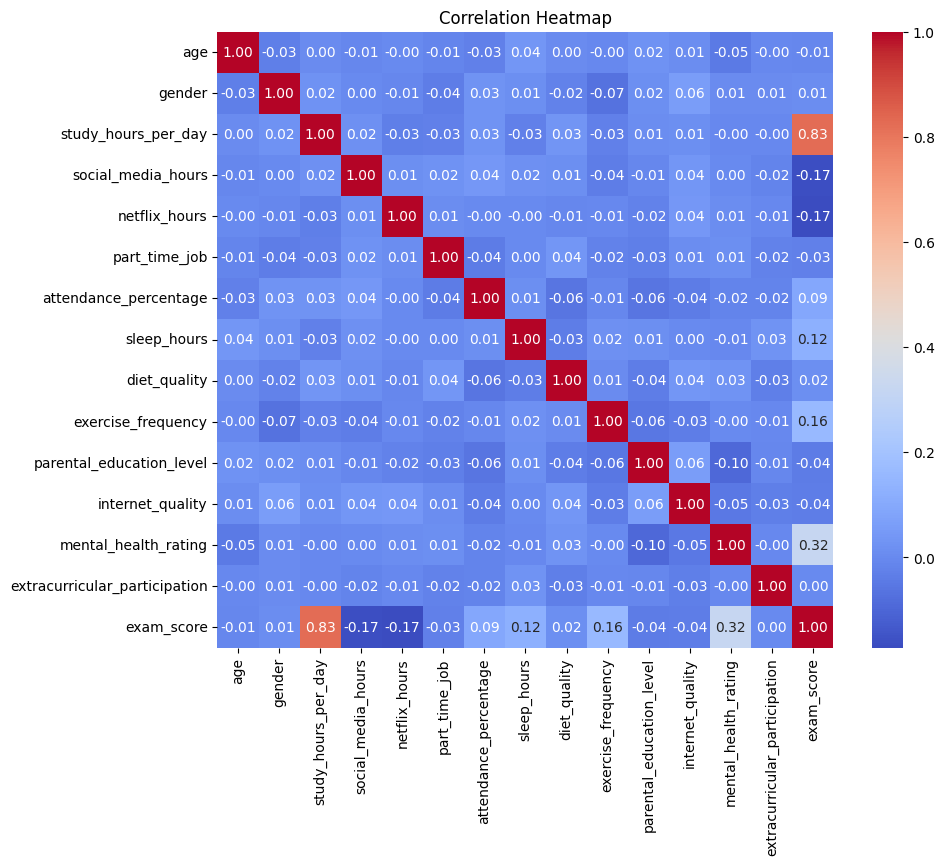

In [15]:
# Ubah beberapa kolom kategorikal menjadi numerik untuk analisis korelasi
df_encoded = df.copy()
df_encoded['gender'] = df_encoded['gender'].map({'Male': 0, 'Female': 1})
df_encoded['part_time_job'] = df_encoded['part_time_job'].map({'No': 0, 'Yes': 1})
df_encoded['diet_quality'] = df_encoded['diet_quality'].map({'Poor': 0, 'Fair': 1, 'Good': 2})
df_encoded['parental_education_level'] = df_encoded['parental_education_level'].map({'High School': 0, 'Master': 1})
df_encoded['internet_quality'] = df_encoded['internet_quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})
df_encoded['extracurricular_participation'] = df_encoded['extracurricular_participation'].map({'No': 0, 'Yes': 1})

# --- Heatmap Korelasi ---
plt.figure(figsize=(10, 8))
corr_matrix = df_encoded.drop(columns=['student_id']).corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# Ambil korelasi terhadap 'exam_score' dan urutkan
correlations = corr_matrix['exam_score'].drop('exam_score')  # Drop korelasi dengan dirinya sendiri
top_5_corr = correlations.abs().sort_values(ascending=False).head(5)

# Tampilkan hasil
print("Top 5 fitur dengan korelasi tertinggi terhadap 'exam_score':")
print(top_5_corr)

Top 5 fitur dengan korelasi tertinggi terhadap 'exam_score':
study_hours_per_day     0.825419
mental_health_rating    0.321523
netflix_hours           0.171779
social_media_hours      0.166733
exercise_frequency      0.160107
Name: exam_score, dtype: float64


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
df= df.drop(columns=['student_id'])

##### Drop NaN

In [17]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     909 non-null    object 
 1   age                            909 non-null    int64  
 2   gender                         909 non-null    object 
 3   study_hours_per_day            909 non-null    float64
 4   social_media_hours             909 non-null    float64
 5   netflix_hours                  909 non-null    float64
 6   part_time_job                  909 non-null    object 
 7   attendance_percentage          909 non-null    float64
 8   sleep_hours                    909 non-null    float64
 9   diet_quality                   909 non-null    object 
 10  exercise_frequency             909 non-null    int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               909 non-null    object 


#### Drop Duplicate

In [19]:
def drop_duplicate(df):
    duplicate = df.duplicated().sum()
    print("Jumlah duplikasi:",duplicate)

    df = df.drop_duplicates()
    duplicate = df.duplicated().sum()
    print("Jumlah duplikasi:",duplicate)
    return df

df_drop_duplicated=drop_duplicate(df)

Jumlah duplikasi: 0
Jumlah duplikasi: 0


#### Normalisasi

In [20]:
df_drop_duplicated.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [26]:
# Pilih fitur numerik untuk dinormalisasi
numerical_features = ['age','study_hours_per_day', 'social_media_hours', 'netflix_hours',
                'attendance_percentage', 'sleep_hours','exercise_frequency', 'mental_health_rating', 'exam_score']


scaler = MinMaxScaler()
df_drop_duplicated[numerical_features] = scaler.fit_transform(df_drop_duplicated[numerical_features])
df_drop_duplicated.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,0.857143,Female,0.000000,0.166667,0.203704,No,0.659091,0.705882,Fair,1.000000,Master,Average,0.777778,Yes,0.463235
1,S1001,0.428571,Female,0.831325,0.388889,0.425926,No,0.938636,0.205882,Good,1.000000,High School,Average,0.777778,No,1.000000
2,S1002,0.571429,Male,0.168675,0.430556,0.240741,No,0.881818,0.705882,Poor,0.166667,High School,Poor,0.000000,No,0.194853
3,S1003,0.857143,Female,0.120482,0.541667,0.185185,No,0.340909,0.882353,Poor,0.666667,Master,Good,0.000000,Yes,0.102941
4,S1004,0.285714,Female,0.602410,0.611111,0.092593,No,0.793182,0.250000,Fair,0.500000,Master,Good,0.000000,No,0.588235


In [31]:


def outlier(df, numerical_cols, threshold=1.5):    
    df_winsorized = df.copy()
    
    # Winsorizing untuk numerical_cols biasa
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    for col in numerical_cols:
        df_winsorized[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
        df_winsorized[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df_winsorized[col])
    
    return df_winsorized

df_outlier_fixed = outlier(df_drop_duplicated,numerical_features)
df_outlier_fixed.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,0.857143,Female,0.000000,0.166667,0.203704,No,0.659091,0.705882,Fair,1.000000,Master,Average,0.777778,Yes,0.463235
1,S1001,0.428571,Female,0.831325,0.388889,0.425926,No,0.938636,0.205882,Good,1.000000,High School,Average,0.777778,No,1.000000
2,S1002,0.571429,Male,0.168675,0.430556,0.240741,No,0.881818,0.705882,Poor,0.166667,High School,Poor,0.000000,No,0.194853
3,S1003,0.857143,Female,0.120482,0.541667,0.185185,No,0.340909,0.882353,Poor,0.666667,Master,Good,0.000000,Yes,0.102941
4,S1004,0.285714,Female,0.602410,0.611111,0.092593,No,0.793182,0.250000,Fair,0.500000,Master,Good,0.000000,No,0.588235


In [40]:
df_encoded = df_outlier_fixed.copy()

encoder = LabelEncoder()

for col in categorical_cols:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

df_encoded.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,0.857143,0,0.000000,0.166667,0.203704,0,0.659091,0.705882,0,1.000000,2,0,0.777778,1,0.463235
1,S1001,0.428571,0,0.831325,0.388889,0.425926,0,0.938636,0.205882,1,1.000000,1,0,0.777778,0,1.000000
2,S1002,0.571429,1,0.168675,0.430556,0.240741,0,0.881818,0.705882,2,0.166667,1,2,0.000000,0,0.194853
3,S1003,0.857143,0,0.120482,0.541667,0.185185,0,0.340909,0.882353,2,0.666667,2,1,0.000000,1,0.102941
4,S1004,0.285714,0,0.602410,0.611111,0.092593,0,0.793182,0.250000,0,0.500000,2,1,0.000000,0,0.588235
